# Kmeans for pre-processing,  dimensionality reduction

We will look at the idea of using K-means to reduce the dimensionality of the data, for the MNIST data set

The idea is to work with the kMeans distances instead of the actual data

We will load and check the MNIST data first

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print (y.shape)

(70000, 784)
(70000,)


In [24]:
X.shape

(70000, 784)

In [31]:
y=y.to_numpy()

In [29]:
X=X.to_numpy()

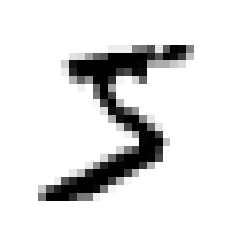

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0,:]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

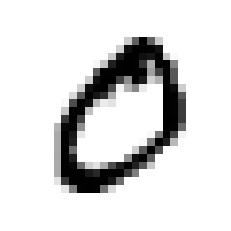

In [32]:
some_digit = X[1,:]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [34]:
y[1]

'0'

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Now try a logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [37]:
log_reg.score(X_test, y_test)

0.9170285714285714

In [ ]:
# for comparison, a neural net

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,10,5), verbose=True, warm_start=False)

clf.fit(X_train, y_train)


Iteration 1, loss = 2.84028374
Iteration 2, loss = 2.10891256
Iteration 3, loss = 2.02714251
Iteration 4, loss = 1.88560736
Iteration 5, loss = 1.67665729
Iteration 6, loss = 1.54742581
Iteration 7, loss = 1.48377237
Iteration 8, loss = 1.43197148
Iteration 9, loss = 1.37943490
Iteration 10, loss = 1.32533034
Iteration 11, loss = 1.24980486
Iteration 12, loss = 1.19487040
Iteration 13, loss = 1.11339322
Iteration 14, loss = 1.06984594
Iteration 15, loss = 0.90078617
Iteration 16, loss = 0.76504085
Iteration 17, loss = 0.69650405
Iteration 18, loss = 0.63721634
Iteration 19, loss = 0.59185986
Iteration 20, loss = 0.54908208
Iteration 21, loss = 0.49076592
Iteration 22, loss = 0.39137189
Iteration 23, loss = 0.34363421
Iteration 24, loss = 0.31368696
Iteration 25, loss = 0.29668660
Iteration 26, loss = 0.27952074
Iteration 27, loss = 0.26767922
Iteration 28, loss = 0.25463018
Iteration 29, loss = 0.24430139
Iteration 30, loss = 0.23415096
Iteration 31, loss = 0.22290621
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), max_iter=500,
              random_state=1, verbose=True)

In [39]:
y_pred=clf.predict(X_train)


print( sum(y_pred==y_train)/len(y_pred) )

0.9791238095238095


# Can we reduce the dimensionality of the data and get higher performance in the logisitc regression

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=300)),
])
pipeline.fit(X_train, y_train)

C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=300))])

In [41]:
pipeline.score(X_test, y_test)

0.8916

In [42]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100)),
    ("log_reg", LogisticRegression(max_iter=300)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9048

In [ ]:
We can do a grid search to optimize the k value used in the k means reduction

Warning- this takes a long time to run

In [45]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=30)),
    ("log_reg", LogisticRegression(max_iter=100)),
])


from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=[100,200,300])
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time=  40.0s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time=  33.9s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time=  37.1s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time=  58.3s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time=  59.5s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time=  56.4s


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time= 1.3min


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time= 1.2min


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time= 1.2min


C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=30)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=300))]),
             param_grid={'kmeans__n_clusters': [100, 200, 300]}, verbose=2)

In [46]:
grid_clf.best_params_


{'kmeans__n_clusters': 300}

In [47]:
grid_clf.cv_results_

{'mean_fit_time': array([37.01760793, 58.07696644, 74.87641048]),
 'std_fit_time': array([2.49084427, 1.31884349, 0.55856691]),
 'mean_score_time': array([0.06616505, 0.09744596, 0.11469309]),
 'std_score_time': array([0.00368324, 0.01087791, 0.0134546 ]),
 'param_kmeans__n_clusters': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kmeans__n_clusters': 100},
  {'kmeans__n_clusters': 200},
  {'kmeans__n_clusters': 300}],
 'split0_test_score': array([0.90102857, 0.90771429, 0.91102857]),
 'split1_test_score': array([0.90897143, 0.9108    , 0.91005714]),
 'split2_test_score': array([0.90302857, 0.91034286, 0.90994286]),
 'mean_test_score': array([0.90434286, 0.90961905, 0.91034286]),
 'std_test_score': array([0.0033732 , 0.00135974, 0.00048711]),
 'rank_test_score': array([3, 2, 1])}